In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "../log/worst"
datasets = ["covid"]
index = "lipp"
times = ["bulkload", "insert"]

# Create a dictionary to store data for each time
data_dict = {dataset:{} for dataset in datasets}

for dataset in datasets:
    for time in times:
        file_path = os.path.join(base_dir, dataset, f"{index}_{time}_hist_model_stats.log")
        data = pd.read_csv(file_path)
        # Filter rows where level = 1
        level_1_data = data[data['level'] == 1]
        data_dict[dataset][time] = level_1_data

print("load data sucessfully")

load data sucessfully


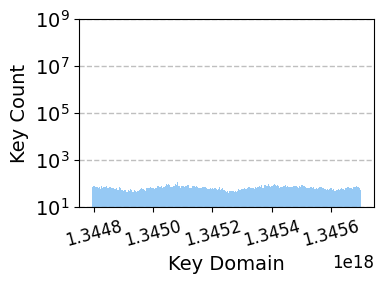

In [45]:
plt.rcParams.update({'font.size': 12})
dataset = "covid"
fig, ax = plt.subplots(figsize=(4, 3))

def merge_slot(ori_level_1_data, chunk_size):
    num_chunks = len(ori_level_1_data) // chunk_size
    merged_data = []
    for i in range(num_chunks):
        # Select the chunk
        chunk = ori_level_1_data.iloc[i * chunk_size:(i + 1) * chunk_size]
        non_zero_keys = chunk[chunk['key'] != 0]['key']
        first_non_zero_key = non_zero_keys.iloc[0] if not non_zero_keys.empty else 0
        # Create the new row
        new_row = {
            'key': first_non_zero_key,  # First row's key
            'hist': chunk['hist'].sum(),  # Sum of hist
            'level': chunk.iloc[0]['level']  # First row's level
        }
        merged_data.append(new_row)
    # Convert the list of dicts to a DataFrame
    merged_df = pd.DataFrame(merged_data)
    return merged_df

time = "bulkload"
ori_level_1_data = data_dict[dataset][time]
level_1_data = merge_slot(ori_level_1_data, 100)

for j, df in level_1_data.iterrows():
    if time == "insert" and j == len(level_1_data) - 1:
        ax.bar(df['key'], df['hist'], width=1e13, color='#d24737')
    else:
        ax.bar(df['key'], df['hist'], width=1e12, color='#96C9F4')

ax.set_xlabel('Key Domain', fontsize=14)
ax.set_ylabel('Key Count', fontsize=14)
ax.set_yscale('log', base=10)
ax.set_ylim(10, 1e9)

plt.xticks(rotation=15,fontsize=12)
plt.yticks(fontsize=14)
plt.gca().yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()
fig.savefig('./fig/lipp_model_dist_bulkload.pdf', bbox_inches='tight', transparent=True)


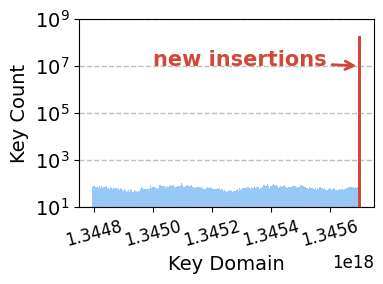

In [46]:
plt.rcParams.update({'font.size': 12})
dataset = "covid"
fig, ax = plt.subplots(figsize=(4, 3))

def merge_slot(ori_level_1_data, chunk_size):
    num_chunks = len(ori_level_1_data) // chunk_size
    merged_data = []
    for i in range(num_chunks):
        # Select the chunk
        chunk = ori_level_1_data.iloc[i * chunk_size:(i + 1) * chunk_size]
        non_zero_keys = chunk[chunk['key'] != 0]['key']
        first_non_zero_key = non_zero_keys.iloc[0] if not non_zero_keys.empty else 0
        # Create the new row
        new_row = {
            'key': first_non_zero_key,  # First row's key
            'hist': chunk['hist'].sum(),  # Sum of hist
            'level': chunk.iloc[0]['level']  # First row's level
        }
        merged_data.append(new_row)
    # Convert the list of dicts to a DataFrame
    merged_df = pd.DataFrame(merged_data)
    return merged_df

time = "insert"
ori_level_1_data = data_dict[dataset][time]
level_1_data = merge_slot(ori_level_1_data, 100)

for j, df in level_1_data.iterrows():
    if time == "insert" and j == len(level_1_data) - 1:
        ax.bar(df['key'], df['hist'], width=1e13, color='#d24737')
    else:
        ax.bar(df['key'], df['hist'], width=1e12, color='#96C9F4')

ax.set_xlabel('Key Domain', fontsize=14)
ax.set_ylabel('Key Count', fontsize=14)
ax.set_yscale('log', base=10)
ax.set_ylim(10, 1e9)

plt.xticks([1.3448*1e18, 1.3450*1e18, 1.3452*1e18, 1.3454*1e18, 1.3456*1e18],rotation=15,fontsize=12)
plt.yticks(fontsize=14)
plt.gca().yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.annotate('new insertions', xy=(1.3457*1e18, 1e7), xytext=(1.3450*1e18, 1e7), color='#d24737', fontsize=15, fontweight='bold', arrowprops=dict(arrowstyle='->', color='#d24737', linewidth=2))
plt.tight_layout()
plt.show()
fig.savefig('./fig/lipp_model_dist_insert.pdf', bbox_inches='tight', transparent=True)